# Homework



In [0]:
# Update torch, torchvision and numpy
!pip install -U torch torchvision numpy opencv-python

In [0]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

In [0]:
# Install homework repository
# !git clone https://github.com/szykry/CVML_HW.git

In [0]:
# Set root folder
import os
name = "/content/CVML_HW/"
os.chdir(name)
!pwd

In [0]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

# Tradition



In [0]:
# https://docs.opencv.org/4.3.0/d1/d1a/namespacecv_1_1cuda.html

# Tábla -> hough
# szegmentális
# cv.threshold


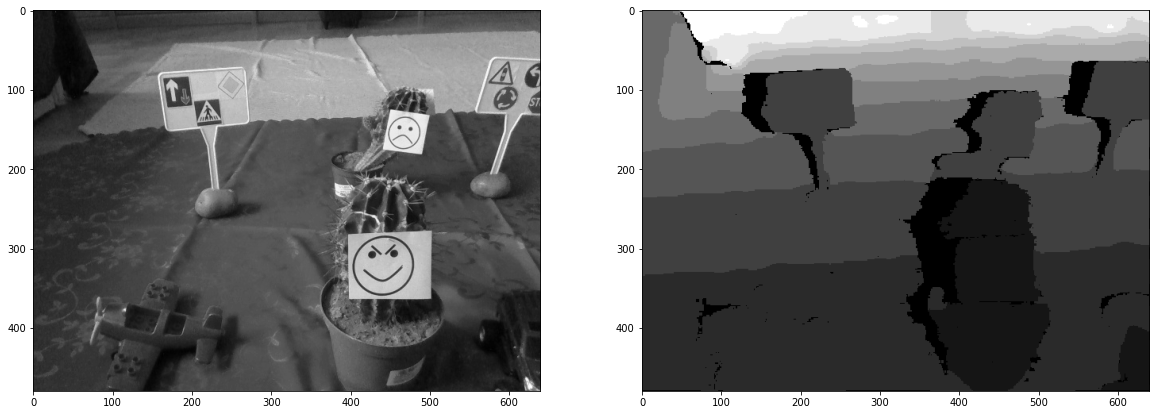

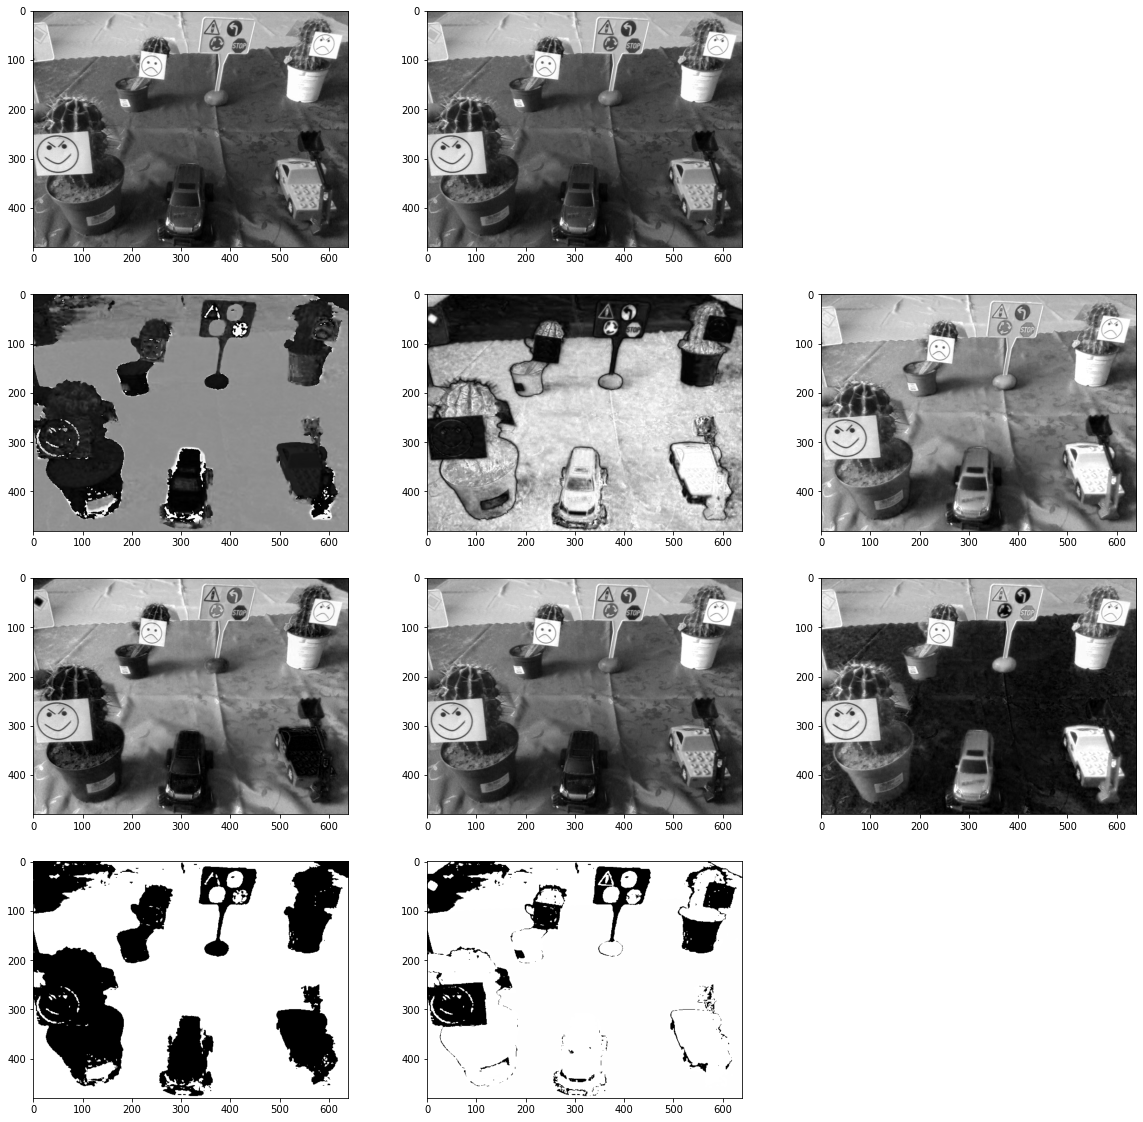

In [6]:
#OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

minVal=0.0
maxVal=0.0

img = cv2.imread("HW/g3/rgb/1.jpg")   # 2.param: RGB, Grayscale, Bináriskép
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(img_gray)    # hol vannak a szélsőértékek
res=img_gray
cv2.convertScaleAbs(img_gray,res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

depth_img = cv2.imread("HW/g3/depth/1.png")
depth_img_gray = cv2.cvtColor(depth_img, cv2.COLOR_BGR2GRAY)
minVal, maxVal, _, _ = cv2.minMaxLoc(depth_img_gray)    # hol vannak a szélsőértékek
depth_res=depth_img_gray
cv2.convertScaleAbs(depth_img_gray,depth_res,255/(maxVal-minVal),-minVal)  # affin -> kép*alfa + béta

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(depth_res,cmap='gray')


rowSubplot = 4
colSubplot = 3


plt.figure(figsize=(20,20))
imgBGR = cv2.imread("HW/g3/rgb/136.jpg")
grayimg = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
minVal,maxVal,_,_ = cv2.minMaxLoc(grayimg)
plt.subplot(rowSubplot,colSubplot,1)
plt.imshow(grayimg,cmap='gray')

res=grayimg
cv2.convertScaleAbs(grayimg,res,255.0/(maxVal-minVal),-minVal)
plt.subplot(rowSubplot,colSubplot,2)
plt.imshow(res,cmap='gray')

imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV);
hue_channel = imgHSV[:,:,0]
saturation_channel = imgHSV[:,:,1]
value_channel = imgHSV[:,:,2]
plt.subplot(rowSubplot,colSubplot,4)
plt.imshow(hue_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,5)
plt.imshow(saturation_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,6)
plt.imshow(value_channel,cmap='gray')

avg_hue = np.average(hue_channel)
hue_channel_thresh, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
plt.subplot(rowSubplot,colSubplot,10)
plt.imshow(hue_channel_segment,cmap='gray')

avg_saturation = np.average(saturation_channel)
saturation_channel_thresh, saturation_channel_segment = cv2.threshold(saturation_channel,(avg_saturation)/2,255,cv2.THRESH_BINARY)
plt.subplot(rowSubplot,colSubplot,11)
plt.imshow(saturation_channel_segment+hue_channel_segment,cmap='gray')

blue_channel = imgBGR[:,:,0]
green_channel = imgBGR[:,:,1]
red_channel = imgBGR[:,:,2]
plt.subplot(rowSubplot,colSubplot,7)
plt.imshow(blue_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,8)
plt.imshow(green_channel,cmap='gray')
plt.subplot(rowSubplot,colSubplot,9)
plt.imshow(red_channel,cmap='gray')


In [0]:
# Get all subfolders in a directory
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]

In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.extension"))

In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

In [0]:
# Display the first images
colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("HW/g1/rgb/1.jpg")
depth = cv2.imread("HW/g1/depth/1.png", -1)

# Read annotations
file = open('HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')